In [5]:
#cd '/Users/nikhilsingh/Downloads/Dalmia_machine_learning/Nikhil'

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import joblib
import pandas as pd

class Training_module:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    def train_decision_tree(self):
        model = DecisionTreeClassifier()
        model.fit(self.X_train, self.y_train)
        self.evaluate_model(model, "Decision Tree")
        self.save_model(model, "Decision_Tree") 

    def train_svm(self):
        model = SVC(probability=True,kernel='rbf',class_weight={0:0.5,1:1.2})
        model.fit(self.X_train, self.y_train)
        self.evaluate_model(model, "SVM")
        self.save_model(model, "SVM")

    def train_random_forest(self):
        model = RandomForestClassifier()
        model.fit(self.X_train, self.y_train)
        self.evaluate_model(model, "Random Forest")
        self.save_model(model, "Random Forest")

    def train_knn(self):
        model = KNeighborsClassifier()
        model.fit(self.X_train, self.y_train)
        self.evaluate_model(model, "K-Nearest Neighbors")
        self.save_model(model, "K-Nearest Neighbors")

    def train_xgboost(self):
        model = XGBClassifier()
        model.fit(self.X_train, self.y_train)
        self.evaluate_model(model, "XGBoost")
        self.save_model(model, "XGBoost")

    def train_xgboost_rf(self):
        model = XGBRFClassifier()
        model.fit(self.X_train, self.y_train)
        self.evaluate_model(model, "XGBoost Random Forest")
        self.save_model(model, "XGBoost Random Forest")

    def evaluate_model(self, model, model_name):
        y_pred = model.predict(self.X_test)
        y_prob = model.predict_proba(self.X_test)[:, 1]

        print(f"Classification Report for {model_name}:\n")
        print(classification_report(self.y_test, y_pred))

        print(f"Confusion Matrix for {model_name}:\n")
        print(confusion_matrix(self.y_test, y_pred))

        self.plot_roc_curve(model, model_name, y_prob)

    def plot_roc_curve(self, model, model_name, y_prob):
        n_classes = len(set(self.y))

        if n_classes == 2:
            self.plot_binary_roc_curve(model_name, self.y_test, y_prob)
        else:
            self.plot_multiclass_roc_curve(model_name, self.y_test, y_prob, n_classes)

    def plot_binary_roc_curve(self, model_name, y_test, y_prob):
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend(loc='lower right')
        plt.show()

    def plot_multiclass_roc_curve(self, model_name, y_test, y_prob, n_classes):
        y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(figsize=(8, 6))
        colors = ['darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Multiclass ROC Curve for {model_name}')
        plt.legend(loc='lower right')
        plt.show()
        
        
    def save_model(self, model, model_name):
        filename = f"{model_name}_model.pkl"
        joblib.dump(model, filename)

    def load_model(self, model_name):
        filename = f"{model_name}_model.pkl"
        return joblib.load(filename)
        
    def validate_saved_model(self, model_name, X_val , y_val):
        loaded_model = self.load_model(model_name)
        # You can use the loaded model for validation or inference
        y_pred = loaded_model.predict(X_val)
        y_prob = loaded_model.predict_proba(X_val)[:, 1]
        print(f"Validation Results for {model_name}:\n")
        print(classification_report(y_val, y_pred))
        print(confusion_matrix(y_val, y_pred))
        self.plot_binary_roc_curve(loaded_model, y_val, y_prob)
        return y_pred , y_prob

In [7]:
train_df = pd.read_csv('jul_aug.csv')
train_df.index = train_df['Unnamed: 0']
train_df.drop('Unnamed: 0' , axis = 1 , inplace = True)
y = pd.read_csv('target_jul_aug.csv')
y.index = y['Sold To Party Code']
y.drop('Sold To Party Code' , axis = 1 , inplace = True)

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2542
           1       0.73      0.69      0.71      1087

    accuracy                           0.83      3629
   macro avg       0.80      0.79      0.80      3629
weighted avg       0.83      0.83      0.83      3629

Confusion Matrix for Random Forest:

[[2266  276]
 [ 334  753]]


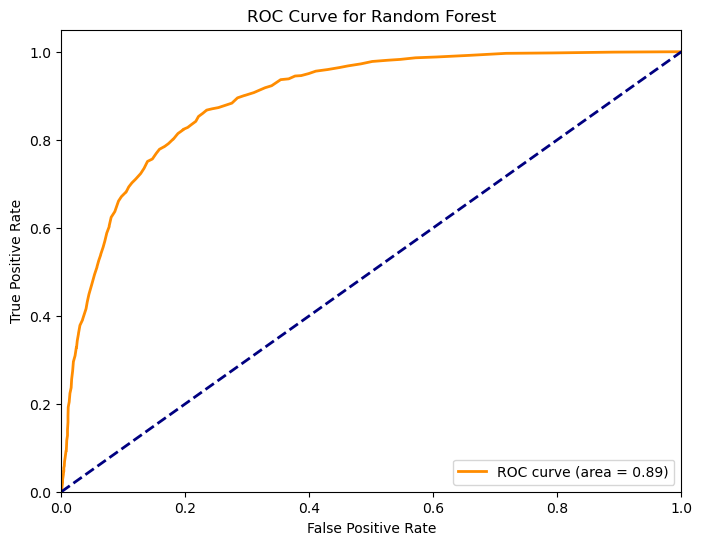

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(train_df)
y = y[y.index.isin(train_df.index)]
y_1 = y['state_m'].replace({'Active':0, 'Active_1N':1})
trainer = Training_module(X, y_1)
trainer.train_random_forest()

In [52]:

train_df_1 = train_df.merge(y['state_m'], left_index = True , right_index = True, how = 'inner')
train_df_1 = train_df_1[train_df_1['state_m']=='Active_1N']

In [53]:
y_1 = y['state_m'].index.isin()

,m-1,m-2,m-3,m-1_yoy,m-2_yoy,m-3_yoy,m-1_hy,m-2_hy,m-3_hy,m-1_qoq,...,avg_sales,Active_1N_count,Active_2N_count,Active_3N_count,Inactive_count,avg_discount,avg_pd,sold_to_party_district_name,sales_region,state_m
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
7000010,12.00,33.8,0.0,-18.00,9.8,0.00,-13.00,9.8,-25.00,-5.00,...,26.450000,3.0,0.0,0.0,0.0,7740.108333,3348.170833,61,1,Active_1N
7000015,27.00,74.0,45.0,-50.00,3.5,-23.50,-48.50,47.0,-25.50,-27.50,...,60.012500,0.0,0.0,0.0,0.0,26527.502527,8735.627813,269,1,Active_1N
7000022,29.00,0.0,24.0,29.00,0.0,24.00,5.00,-12.0,12.00,8.00,...,6.479167,1.0,0.0,0.0,0.0,2464.193442,768.258854,167,1,Active_1N
7000027,144.95,35.0,68.5,-1379.20,-395.5,-619.85,139.95,-478.0,-157.75,52.95,...,527.460417,0.0,0.0,0.0,0.0,433644.115444,98826.153125,24,1,Active_1N
7000044,25.00,0.0,0.0,25.00,0.0,0.00,25.00,0.0,0.00,25.00,...,3.833333,0.0,0.0,0.0,0.0,605.208333,78.125000,34,1,Active_1N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039604,2.00,0.0,0.0,2.00,0.0,0.00,2.00,0.0,0.00,2.00,...,0.083333,0.0,0.0,0.0,0.0,67.924150,45.572917,197,4,Active_1N
7039616,12.00,0.0,0.0,12.00,0.0,0.00,12.00,0.0,0.00,12.00,...,0.500000,0.0,0.0,0.0,0.0,342.544908,273.437500,76,4,Active_1N
7039714,1.25,0.0,0.0,1.25,0.0,0.00,1.25,0.0,0.00,1.25,...,0.052083,0.0,0.0,0.0,0.0,22.378342,14.648333,48,4,Active_1N


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2542
           1       0.71      0.69      0.70      1087

    accuracy                           0.82      3629
   macro avg       0.79      0.79      0.79      3629
weighted avg       0.82      0.82      0.82      3629

Confusion Matrix for XGBoost:

[[2237  305]
 [ 333  754]]


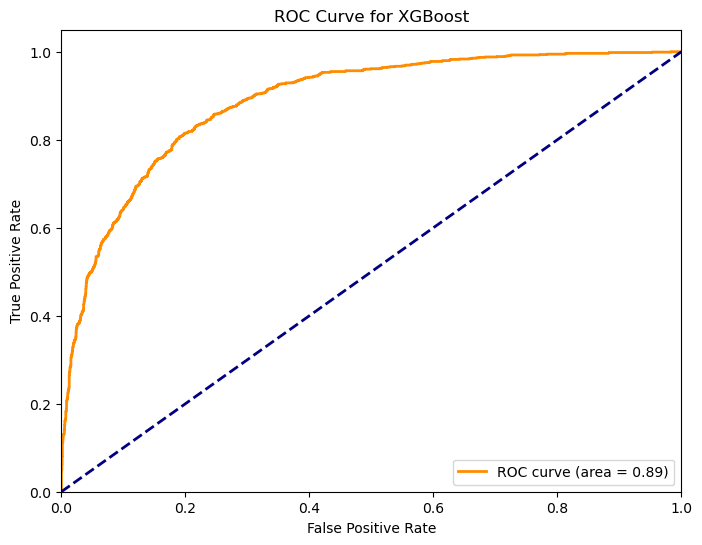

In [9]:
trainer.train_xgboost()

In [10]:
val_df = pd.read_csv('val_aug_jul.csv')
val_df.index = val_df['Unnamed: 0']
val_df.drop('Unnamed: 0', axis = 1 , inplace =True)

In [11]:
val_df

,m-1,m-2,m-3,m-1_yoy,m-2_yoy,m-3_yoy,m-1_hy,m-2_hy,m-3_hy,m-1_qoq,...,avg_sales,Active_1N_count,Active_2N_count,Active_3N_count,Inactive_count,avg_discount,avg_pd,sold_to_party_district_name,sales_region,m
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
7000004,80.0,96.0,111.0,58.0,61.0,-3.0,5.0,-26.5,91.00,34.0,...,65.229167,0.0,0.0,0.0,0.0,26859.696000,9972.625000,25,1,Active
7000010,24.0,12.0,24.0,-9.8,12.0,7.0,24.0,12.0,24.00,24.0,...,13.200000,1.0,1.0,1.0,5.0,2653.938437,937.490000,51,1,Active
7000022,12.0,12.0,27.0,0.0,9.0,23.5,-12.0,-9.0,22.00,12.0,...,8.604167,2.0,0.0,0.0,0.0,3309.500625,2083.333333,148,1,Active
7000025,147.0,109.0,132.0,-28.0,-52.0,32.0,-20.0,36.0,23.20,-11.0,...,112.137500,0.0,0.0,0.0,0.0,51799.686500,19921.866667,233,1,Active
7000029,90.0,55.0,60.0,60.0,-79.9,15.0,30.0,-58.0,-28.00,60.0,...,77.454167,0.0,0.0,0.0,0.0,26146.318000,12499.993333,140,1,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036645,3.5,6.0,2.0,0.5,6.0,2.0,-3.5,0.0,-15.45,-2.5,...,3.127083,0.0,0.0,0.0,0.0,3913.353333,5498.166667,157,4,Active_1N
7036660,25.0,25.0,50.0,0.0,25.0,50.0,-25.0,-25.0,25.00,-5.0,...,23.541667,0.0,0.0,0.0,0.0,25140.420000,18880.333333,38,4,Active_1N
7036676,25.0,25.0,0.0,15.0,25.0,0.0,-5.0,25.0,0.00,0.0,...,5.208333,3.0,2.0,1.0,1.0,27648.435000,14648.435000,154,4,Active_1N


Validation Results for Random Forest:

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      6647
           1       0.26      0.61      0.37       850

    accuracy                           0.76      7497
   macro avg       0.60      0.70      0.61      7497
weighted avg       0.86      0.76      0.80      7497

[[5195 1452]
 [ 331  519]]


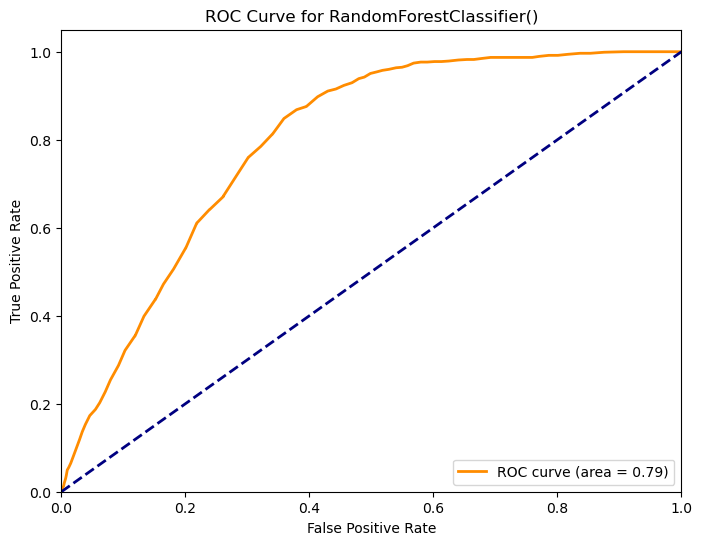

In [12]:
from sklearn.preprocessing import StandardScaler
X_val = val_df.drop('m',axis = 1)
y_val = val_df['m'].replace({'Active':0,'Active_1N':1})
sc = StandardScaler()
X_val = sc.fit_transform(X_val)
y_pred, y_prob = trainer.validate_saved_model('Random Forest' , X_val , y_val)

Validation Results for XGBoost:

              precision    recall  f1-score   support

           0       0.97      0.56      0.71      6647
           1       0.20      0.88      0.33       850

    accuracy                           0.60      7497
   macro avg       0.59      0.72      0.52      7497
weighted avg       0.89      0.60      0.67      7497

[[3731 2916]
 [ 101  749]]


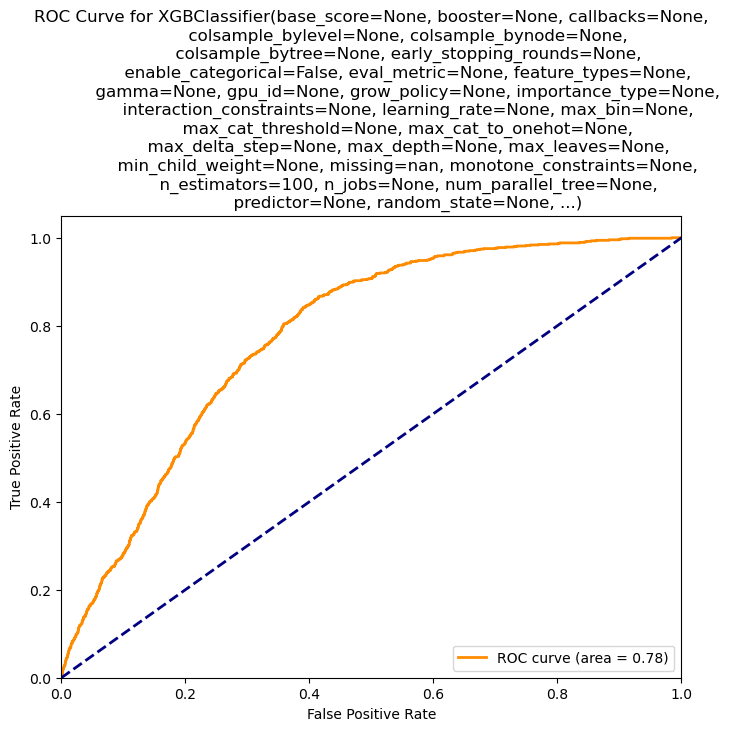

In [13]:
from sklearn.preprocessing import StandardScaler
X_val = val_df.drop('m',axis = 1)
y_val = val_df['m'].replace({'Active':0,'Active_1N':1})
sc = StandardScaler()
X_val = sc.fit_transform(X_val)
y_pred, y_prob = trainer.validate_saved_model('XGBoost' , X_val , y_val)

In [14]:
val_df['predicted'] = y_pred
val_df['predicted_proba'] = y_prob

In [15]:
val_df['predicted'] = val_df['predicted'].replace({0:'Active',1:'Active_1N'})

In [16]:
# condition = (val_df['predicted_proba'] <0.60)  
# val_df.loc[condition, 'predicted'] = 'Active'
condition = (val_df['predicted_proba'] >0.45)
val_df.loc[condition, 'predicted'] = 'Active_1N'

In [17]:
print('XGBoost Classification Report')
print(classification_report(val_df['m'],val_df['predicted']))
print('Random Forest Confusion Matrix')
print(confusion_matrix(val_df['m'],val_df['predicted']))

XGBoost Classification Report
              precision    recall  f1-score   support

      Active       0.98      0.54      0.70      6647
   Active_1N       0.20      0.89      0.33       850

    accuracy                           0.58      7497
   macro avg       0.59      0.72      0.51      7497
weighted avg       0.89      0.58      0.66      7497

Random Forest Confusion Matrix
[[3616 3031]
 [  91  759]]


In [18]:
val_df_1 = pd.read_csv('val_df_1.csv')

In [19]:
pivot_df = pd.read_csv('change_rating.csv')

In [20]:
pivot_df.index = pivot_df['Sold To Party Code']
pivot_df.drop('Sold To Party Code', axis = 1 , inplace = True)

In [21]:
val_df_1.index = val_df_1['Unnamed: 0']
val_df_1.drop('Unnamed: 0', axis = 1 , inplace = True)

In [22]:
val_df_2 = val_df.merge(val_df_1['dealer_size'], left_index=True , right_index=True , how = 'inner')

In [23]:
val_df_2 = val_df_2.merge(pivot_df['change_h2_rating'], left_index=True , right_index=True , how = 'inner')

In [24]:
val_df_2

,m-1,m-2,m-3,m-1_yoy,m-2_yoy,m-3_yoy,m-1_hy,m-2_hy,m-3_hy,m-1_qoq,...,Inactive_count,avg_discount,avg_pd,sold_to_party_district_name,sales_region,m,predicted,predicted_proba,dealer_size,change_h2_rating
7000004,80.0,96.0,111.0,58.0,61.0,-3.0,5.0,-26.5,91.0,34.00,...,0.0,26859.696000,9972.625000,25,1,Active,Active,0.004480,Medium,High_rise
7000010,24.0,12.0,24.0,-9.8,12.0,7.0,24.0,12.0,24.0,24.00,...,5.0,2653.938437,937.490000,51,1,Active,Active_1N,0.983104,Small,Fall
7000025,147.0,109.0,132.0,-28.0,-52.0,32.0,-20.0,36.0,23.2,-11.00,...,0.0,51799.686500,19921.866667,233,1,Active,Active,0.007421,Medium,Rise
7000029,90.0,55.0,60.0,60.0,-79.9,15.0,30.0,-58.0,-28.0,60.00,...,0.0,26146.318000,12499.993333,140,1,Active,Active,0.125750,Medium,Same
7000032,517.0,495.0,460.0,116.0,60.0,5.0,46.0,50.0,39.0,93.00,...,0.0,198668.507562,67734.286667,18,1,Active,Active,0.000281,Large,Rise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036192,26.0,37.0,27.0,2.0,12.0,3.0,-24.0,25.0,15.0,-16.00,...,0.0,25093.703333,19609.436667,41,4,Active_1N,Active_1N,0.702614,Small,Rise
7036206,57.0,36.2,20.0,2.0,16.2,-5.0,57.0,16.2,-12.0,22.00,...,0.0,37798.056667,27296.990000,8,4,Active_1N,Active_1N,0.826450,Small,Rise
7036220,5.0,13.0,12.0,0.0,13.0,0.0,-5.0,-4.0,7.0,-5.00,...,0.0,2028.840000,3671.860000,45,1,Active_1N,Active_1N,0.985100,Small,Same
7036236,-20.0,20.0,4.5,-22.0,-2.5,-2.0,-58.0,-24.0,-20.5,-20.00,...,0.0,10408.500000,7910.220000,140,4,Active_1N,Active_1N,0.944331,Small,High_fall


In [25]:
val_df_2.to_csv('val_df_2.csv')

In [26]:
print('Random Forest Classification Report')
print(classification_report(val_df_2['m'],val_df_2['predicted']))
print('Random Forest Confusion Matrix')
print(confusion_matrix(val_df_2['m'],val_df_2['predicted']))

Random Forest Classification Report
              precision    recall  f1-score   support

      Active       0.98      0.56      0.71      6083
   Active_1N       0.18      0.90      0.30       657

    accuracy                           0.59      6740
   macro avg       0.58      0.73      0.51      6740
weighted avg       0.90      0.59      0.67      6740

Random Forest Confusion Matrix
[[3415 2668]
 [  67  590]]


In [27]:
large = val_df_2[val_df_2['dealer_size']=='Large']

In [28]:
print('Random Forest Classification Report Large')
print(classification_report(large['m'],large['predicted']))
print('Random Forest Confusion Matrix')
print(confusion_matrix(large['m'],large['predicted']))

Random Forest Classification Report Large
              precision    recall  f1-score   support

      Active       1.00      0.87      0.93      1682
   Active_1N       0.11      0.80      0.19        35

    accuracy                           0.86      1717
   macro avg       0.55      0.83      0.56      1717
weighted avg       0.98      0.86      0.91      1717

Random Forest Confusion Matrix
[[1455  227]
 [   7   28]]


In [29]:
medium = val_df_2[val_df_2['dealer_size']=='Medium']
print('Random Forest Classification Report Medium')
print(classification_report(medium['m'],medium['predicted']))
print('Random Forest Confusion Matrix')
print(confusion_matrix(medium['m'],medium['predicted']))

Random Forest Classification Report Medium
              precision    recall  f1-score   support

      Active       0.97      0.61      0.75      2914
   Active_1N       0.13      0.78      0.23       222

    accuracy                           0.62      3136
   macro avg       0.55      0.70      0.49      3136
weighted avg       0.91      0.62      0.71      3136

Random Forest Confusion Matrix
[[1783 1131]
 [  49  173]]


In [30]:
condition = (medium['predicted_proba'] > 0.40)
medium.loc[condition, 'predicted'] = 'Active_1N'

In [31]:
print('Random Forest Classification Report')
print(classification_report(medium['m'],medium['predicted']))
print('Random Forest Confusion Matrix')
print(confusion_matrix(medium['m'],medium['predicted']))

Random Forest Classification Report
              precision    recall  f1-score   support

      Active       0.97      0.59      0.74      2914
   Active_1N       0.13      0.79      0.22       222

    accuracy                           0.61      3136
   macro avg       0.55      0.69      0.48      3136
weighted avg       0.91      0.61      0.70      3136

Random Forest Confusion Matrix
[[1727 1187]
 [  46  176]]


In [32]:
small = val_df_2[val_df_2['dealer_size']=='Small']
print('Random Forest Classification Report Small')
print(classification_report(small['m'],small['predicted']))
print('Random Forest Confusion Matrix')
print(confusion_matrix(small['m'],small['predicted']))

Random Forest Classification Report Small
              precision    recall  f1-score   support

      Active       0.94      0.12      0.21      1487
   Active_1N       0.23      0.97      0.37       400

    accuracy                           0.30      1887
   macro avg       0.59      0.55      0.29      1887
weighted avg       0.79      0.30      0.25      1887

Random Forest Confusion Matrix
[[ 177 1310]
 [  11  389]]


In [34]:
small.to_csv('small_dealer.csv')

In [38]:
small['discount_per_bag'] = (small['avg_discount']/small['avg_sales'])/20

/var/folders/m3/m633mc4s5tsggxm0f81370l80000gn/T/ipykernel_869/2476934118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['discount_per_bag'] = (small['avg_discount']/small['avg_sales'])/20


In [40]:
small['pd_per_bag'] = (small['avg_pd']/small['avg_sales'])/20

/var/folders/m3/m633mc4s5tsggxm0f81370l80000gn/T/ipykernel_869/3538413085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['pd_per_bag'] = (small['avg_pd']/small['avg_sales'])/20


In [42]:
small['pd_per_bag']

7000010     3.551098
7000073    12.772216
7000077    10.399486
7000086    10.000571
7000232     8.010409
             ...    
7036166     6.506090
7036192    46.875147
7036206    80.840049
7036220    44.507394
7036236    55.673103
Name: pd_per_bag, Length: 1887, dtype: float64

In [44]:
small

,m-1,m-2,m-3,m-1_yoy,m-2_yoy,m-3_yoy,m-1_hy,m-2_hy,m-3_hy,m-1_qoq,...,avg_pd,sold_to_party_district_name,sales_region,m,predicted,predicted_proba,dealer_size,change_h2_rating,discount_per_bag,pd_per_bag
7000010,24.0,12.0,24.0,-9.8,12.0,7.0,24.0,12.0,24.0,24.0,...,937.490000,51,1,Active,Active_1N,0.983104,Small,Fall,10.052797,3.551098
7000073,18.0,26.5,21.0,18.0,26.5,1.0,18.0,26.5,21.0,18.0,...,2565.086667,144,1,Active,Active_1N,0.919883,Small,High_rise,28.262793,12.772216
7000077,51.0,40.0,20.0,41.0,10.0,10.0,21.0,30.0,9.0,21.0,...,5260.406667,263,1,Active,Active_1N,0.663347,Small,High_rise,20.105226,10.399486
7000086,60.0,6.0,27.5,60.0,-6.0,22.5,49.0,-64.0,-74.5,4.0,...,8763.000000,145,1,Active_1N,Active_1N,0.921499,Small,High_rise,15.171241,10.000571
7000232,41.0,28.5,33.5,36.0,17.0,7.5,-2.0,9.5,27.5,-4.5,...,4386.700000,125,1,Active,Active_1N,0.695351,Small,High_rise,25.650234,8.010409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036166,1.0,5.0,2.5,-74.0,-20.0,-22.5,-25.5,-35.0,-28.5,-9.0,...,2018.243333,38,4,Active_1N,Active_1N,0.816133,Small,High_fall,7.481220,6.506090
7036192,26.0,37.0,27.0,2.0,12.0,3.0,-24.0,25.0,15.0,-16.0,...,19609.436667,41,4,Active_1N,Active_1N,0.702614,Small,Rise,59.984948,46.875147
7036206,57.0,36.2,20.0,2.0,16.2,-5.0,57.0,16.2,-12.0,22.0,...,27296.990000,8,4,Active_1N,Active_1N,0.826450,Small,Rise,111.938963,80.840049
7036220,5.0,13.0,12.0,0.0,13.0,0.0,-5.0,-4.0,7.0,-5.0,...,3671.860000,45,1,Active_1N,Active_1N,0.985100,Small,Same,24.592000,44.507394


In [215]:
test_data = small[['avg_sales','change_h2_rating','dealer_size','predicted','m']]
test_data.columns = ['avg_sales','change_h2_rating','dealer_size','predicted_rf','m']
condition = (test_data['avg_sales'] > 20) & (test_data['change_h2_rating'] == 'Rise') & (test_data['dealer_size'] == 'Small')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['change_h2_rating'] == 'High_rise') & (test_data['dealer_size'] == 'Small')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['change_h2_rating'].isin(['Rise','Same','High_rise'])) & (test_data['dealer_size'] == 'Medium')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['change_h2_rating'].isin(['Rise','High_rise'])) & (test_data['dealer_size'] == 'Large')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['avg_sales'] > 100) & (test_data['change_h2_rating'] == 'Fall') & (test_data['dealer_size'] == 'Large')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['avg_sales'] > 50) & (test_data['change_h2_rating'] == 'Same') & (test_data['dealer_size'] == 'Large')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'

In [216]:
print('Random Forest Classification Report')
print(classification_report(test_data['m'],test_data['predicted_rf']))
print('Random Forest Confusion Matrix')
print(confusion_matrix(test_data['m'],test_data['predicted_rf']))

Random Forest Classification Report
              precision    recall  f1-score   support

      Active       0.82      0.72      0.77      1487
   Active_1N       0.29      0.43      0.35       400

    accuracy                           0.66      1887
   macro avg       0.56      0.57      0.56      1887
weighted avg       0.71      0.66      0.68      1887

Random Forest Confusion Matrix
[[1066  421]
 [ 227  173]]


In [214]:
condition = (small['predicted_proba'] < 0.55)
small.loc[condition, 'predicted'] = 'Active'
print('Random Forest Classification Report')
print(classification_report(small['m'],small['predicted']))
print('Random Forest Confusion Matrix')
print(confusion_matrix(small['m'],small['predicted']))

Random Forest Classification Report
              precision    recall  f1-score   support

      Active       0.84      0.63      0.72      1487
   Active_1N       0.29      0.56      0.39       400

    accuracy                           0.62      1887
   macro avg       0.57      0.60      0.55      1887
weighted avg       0.73      0.62      0.65      1887

Random Forest Confusion Matrix
[[940 547]
 [174 226]]


In [225]:
319+158+19

496

In [222]:
819+645+90

1554

In [223]:
496/(496+1554)

0.24195121951219511

In [168]:
test_data = large[['avg_sales','change_h2_rating','dealer_size','predicted','m']]
test_data.columns = ['avg_sales','change_h2_rating','dealer_size','predicted_rf','m']
condition = (test_data['avg_sales'] > 20) & (test_data['change_h2_rating'] == 'Rise') & (test_data['dealer_size'] == 'Small')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['change_h2_rating'] == 'High_rise') & (test_data['dealer_size'] == 'Small')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['change_h2_rating'].isin(['Rise','Same','High_rise'])) & (test_data['dealer_size'] == 'Medium')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['change_h2_rating'].isin(['Rise','High_rise'])) & (test_data['dealer_size'] == 'Large')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['avg_sales'] > 100) & (test_data['change_h2_rating'] == 'Fall') & (test_data['dealer_size'] == 'Large')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['avg_sales'] > 50) & (test_data['change_h2_rating'] == 'Same') & (test_data['dealer_size'] == 'Large')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'

In [169]:
print('Random Forest Classification Report')
print(classification_report(test_data['m'],test_data['predicted_rf']))
print('Random Forest Confusion Matrix')
print(confusion_matrix(test_data['m'],test_data['predicted_rf']))

Random Forest Classification Report
              precision    recall  f1-score   support

      Active       0.98      0.99      0.99      1682
   Active_1N       0.25      0.11      0.16        35

    accuracy                           0.97      1717
   macro avg       0.62      0.55      0.57      1717
weighted avg       0.97      0.97      0.97      1717

Random Forest Confusion Matrix
[[1670   12]
 [  31    4]]


In [268]:
val_df_2['pd_per_bag'] = (val_df_2['avg_pd']/(val_df_2['avg_sales']*20))

In [269]:
val_df_2

,m-1,m-2,m-3,m-1_yoy,m-2_yoy,m-3_yoy,m-1_hy,m-2_hy,m-3_hy,m-1_qoq,...,avg_discount,avg_pd,sold_to_party_district_name,sales_region,m,predicted,predicted_proba,dealer_size,change_h2_rating,pd_per_bag
7000004,80.0,96.0,111.0,58.0,61.0,-3.0,5.0,-26.5,91.0,34.00,...,26859.696000,9972.625000,25,1,Active,Active,0.04,Medium,High_rise,7.644299
7000010,24.0,12.0,24.0,-9.8,12.0,7.0,24.0,12.0,24.0,24.00,...,2653.938437,937.490000,51,1,Active,Active_1N,0.60,Small,Fall,3.551098
7000025,147.0,109.0,132.0,-28.0,-52.0,32.0,-20.0,36.0,23.2,-11.00,...,51799.686500,19921.866667,233,1,Active,Active,0.00,Medium,Rise,8.882785
7000029,90.0,55.0,60.0,60.0,-79.9,15.0,30.0,-58.0,-28.0,60.00,...,26146.318000,12499.993333,140,1,Active,Active,0.20,Medium,Same,8.069284
7000032,517.0,495.0,460.0,116.0,60.0,5.0,46.0,50.0,39.0,93.00,...,198668.507562,67734.286667,18,1,Active,Active,0.00,Large,Rise,7.486175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036192,26.0,37.0,27.0,2.0,12.0,3.0,-24.0,25.0,15.0,-16.00,...,25093.703333,19609.436667,41,4,Active_1N,Active,0.45,Small,Rise,46.875147
7036206,57.0,36.2,20.0,2.0,16.2,-5.0,57.0,16.2,-12.0,22.00,...,37798.056667,27296.990000,8,4,Active_1N,Active,0.40,Small,Rise,80.840049
7036220,5.0,13.0,12.0,0.0,13.0,0.0,-5.0,-4.0,7.0,-5.00,...,2028.840000,3671.860000,45,1,Active_1N,Active_1N,0.55,Small,Same,44.507394
7036236,-20.0,20.0,4.5,-22.0,-2.5,-2.0,-58.0,-24.0,-20.5,-20.00,...,10408.500000,7910.220000,140,4,Active_1N,Active_1N,0.62,Small,High_fall,55.673103


In [139]:
test_data = val_df_2[['avg_sales','change_h2_rating','dealer_size','predicted','m','pd_per_bag']]
test_data.columns = ['avg_sales','change_h2_rating','dealer_size','predicted_rf','m','pd_per_bag']
condition = (test_data['avg_sales'] > 20) & (test_data['change_h2_rating'] == 'Rise') & (test_data['dealer_size'] == 'Small')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['change_h2_rating'] == 'High_rise') & (test_data['dealer_size'] == 'Small')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['change_h2_rating'].isin(['Rise','Same','High_rise'])) & (test_data['dealer_size'] == 'Medium')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['change_h2_rating'].isin(['Rise','High_rise'])) & (test_data['dealer_size'] == 'Large')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['avg_sales'] > 100) & (test_data['change_h2_rating'] == 'Fall') & (test_data['dealer_size'] == 'Large')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['avg_sales'] > 50) & (test_data['change_h2_rating'] == 'Same') & (test_data['dealer_size'] == 'Large')&(test_data['predicted_rf'] == 'Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'

In [279]:
val_df_2.columns

Index(['m-1', 'm-2', 'm-3', 'm-1_yoy', 'm-2_yoy', 'm-3_yoy', 'm-1_hy',
       'm-2_hy', 'm-3_hy', 'm-1_qoq', 'm-2_qoq', 'm-3_qoq', 'avg_sales',
       'Active_1N_count', 'Active_2N_count', 'Active_3N_count',
       'Inactive_count', 'avg_discount', 'avg_pd',
       'sold_to_party_district_name', 'sales_region', 'm', 'predicted',
       'predicted_proba', 'dealer_size', 'change_h2_rating', 'pd_per_bag'],
      dtype='object')

In [288]:
   
test_data = val_df_2[['change_h2_rating','dealer_size','predicted','m','pd_per_bag']]
test_data.columns = ['change_h2_rating','dealer_size','predicted_rf','m','pd_per_bag']
condition =(test_data['change_h2_rating'].isin(['Rise']))&(test_data['predicted_rf']=='Active_1N')&(test_data['pd_per_bag']<20)
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['dealer_size'] == 'Large')& (test_data['change_h2_rating'].isin(['Rise','Same','High_rise']))&(test_data['predicted_rf']=='Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
condition = (test_data['dealer_size'] == 'Medium')& (test_data['change_h2_rating'].isin(['High_rise']))&(test_data['predicted_rf']=='Active_1N')
test_data.loc[condition, 'predicted_rf'] = 'Active'
# condition = (test_data['dealer_size'] == 'Medium')&(test_data['change_h2_rating'].isin(['High_rise'])&(test_data['predicted']=='Active_1N')
# test_data.loc[condition, 'predicted_rf'] = 'Active'
                                                
                                                    
                                                    

In [289]:
print(confusion_matrix(test_data['m'],test_data['predicted_rf']))
print(classification_report(test_data['m'],test_data['predicted_rf']))

[[5172  911]
 [ 273  384]]
              precision    recall  f1-score   support

      Active       0.95      0.85      0.90      6083
   Active_1N       0.30      0.58      0.39       657

    accuracy                           0.82      6740
   macro avg       0.62      0.72      0.65      6740
weighted avg       0.89      0.82      0.85      6740



In [40]:
val_df.to_csv('adjusted_val_df.csv')

In [38]:
val_df['predicted_no_adjust'] = y_pred
val_df['predicted_no_adjust'] = val_df['predicted_no_adjust'].replace({0:'Active',1:'Active_1N'})

In [39]:
val_df

,m-1,m-2,m-3,m-1_yoy,m-2_yoy,m-3_yoy,m-1_hy,m-2_hy,m-3_hy,m-1_qoq,...,Active_3N_count,Inactive_count,avg_discount,avg_pd,sold_to_party_district_name,sales_region,m,predicted_no_adjust,predicted,predicted_proba
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
7000004,80.0,96.0,111.0,58.0,61.0,-3.0,5.0,-26.5,91.00,34.0,...,0.0,0.0,26859.696000,9972.625000,25,1,Active,Active,Active,0.08
7000010,24.0,12.0,24.0,-9.8,12.0,7.0,24.0,12.0,24.00,24.0,...,1.0,5.0,2653.938437,937.490000,51,1,Active,Active_1N,Active,0.56
7000022,12.0,12.0,27.0,0.0,9.0,23.5,-12.0,-9.0,22.00,12.0,...,0.0,0.0,3309.500625,2083.333333,148,1,Active,Active_1N,Active,0.59
7000025,147.0,109.0,132.0,-28.0,-52.0,32.0,-20.0,36.0,23.20,-11.0,...,0.0,0.0,51799.686500,19921.866667,233,1,Active,Active,Active,0.02
7000029,90.0,55.0,60.0,60.0,-79.9,15.0,30.0,-58.0,-28.00,60.0,...,0.0,0.0,26146.318000,12499.993333,140,1,Active,Active,Active,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036645,3.5,6.0,2.0,0.5,6.0,2.0,-3.5,0.0,-15.45,-2.5,...,0.0,0.0,3913.353333,5498.166667,157,4,Active_1N,Active_1N,Active_1N,0.61
7036660,25.0,25.0,50.0,0.0,25.0,50.0,-25.0,-25.0,25.00,-5.0,...,0.0,0.0,25140.420000,18880.333333,38,4,Active_1N,Active,Active_1N,0.43
7036676,25.0,25.0,0.0,15.0,25.0,0.0,-5.0,25.0,0.00,0.0,...,1.0,1.0,27648.435000,14648.435000,154,4,Active_1N,Active,Active_1N,0.43


In [55]:
visit_data_23 = pd.read_csv('data/pjp_fy23.csv')
visit_data_24 = pd.read_csv('data/pjp_fy24_Aug23.csv')

In [56]:
visit_data_23 = visit_data_23[visit_data_23['visitType']=='P']

In [57]:
visit_data_23 = visit_data_23[(visit_data_23['sapCode']>7000000)&(visit_data_23['sapCode']<7010000)]

In [58]:
visit_data_24 = visit_data_24[visit_data_24['visitType']=='P']
visit_data_24 = visit_data_24[(visit_data_24['sapCode']>7000000)&(visit_data_24['sapCode']<7010000)]

In [59]:
visit_data_23 = visit_data_23.dropna()
visit_data = pd.concat([visit_data_23,visit_data_24], axis= 0)

In [64]:
visit_data_groupby = visit_data.groupby(['sapCode']).agg({'visitedBy':['count']}).reset_index()

In [66]:
visit_data_groupby.columns = ['Dealer_id', 'Visits']

,Dealer_id,Visits
0,7000004.0,41
1,7000010.0,32
2,7000011.0,8
3,7000012.0,7
4,7000013.0,1
...,...,...
2073,7009895.0,1
2074,7009897.0,3
2075,7009906.0,55
2076,7009952.0,1


In [297]:
list_1 = []
for i in val_df_1['dealer_size'].value_counts().index:
    for j in val_df_1['predicted_proba'].value_counts().index:
        df_1 = val_df_1[(val_df_1['dealer_size']==i)&(val_df_1['predicted_proba']==j)]
        cm = confusion_matrix(df_1['m'], df_1['predicted'])
        list_1.append(cm)
        

In [299]:
val_df_1['predicted_proba'].value_counts().index

Index(['Low', 'Medium', 'High'], dtype='object')

In [300]:
val_df_1['dealer_size'].value_counts().index

Index(['Medium', 'Small', 'Large'], dtype='object')

In [301]:
list_1

[array([[1900,    0],
        [  38,    0]]),
 array([[696, 212],
        [ 73,  56]]),
 array([[  0, 106],
        [  0,  55]]),
 array([[106,   0],
        [  5,   0]]),
 array([[656, 607],
        [122, 231]]),
 array([[  0, 118],
        [  0,  42]]),
 array([[1403,    0],
        [   4,    0]]),
 array([[183,  50],
        [ 12,   6]]),
 array([[ 0, 46],
        [ 0, 13]])]

In [1]:
small

NameError: name 'small' is not defined